In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gp
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# Observacion de los primeros datos de la base de datos

oportunidades = pd.read_csv('Entrenamiento_ECI_2020.csv')
oportunidades['Account_Created_Date'] = pd.to_datetime(oportunidades['Account_Created_Date'])
oportunidades['Opportunity_Created_Date'] = pd.to_datetime(oportunidades['Opportunity_Created_Date'])
oportunidades['Quote_Expiry_Date'] = pd.to_datetime(oportunidades['Quote_Expiry_Date'])
oportunidades['Last_Modified_Date'] = pd.to_datetime(oportunidades['Last_Modified_Date'])
oportunidades['Planned_Delivery_Start_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_Start_Date'])
oportunidades['Planned_Delivery_End_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_End_Date'])
oportunidades.head(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [3]:
# Comprobamos campos nulos en la base de datos
oportunidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [4]:
# Removemos los campos nulos de la base datos

oportunidades = oportunidades.dropna()
oportunidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10115 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  10115 non-null  int64         
 1   Region                              10115 non-null  object        
 2   Territory                           10115 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  10115 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    10115 non-null  int64         
 5   Bureaucratic_Code_0_Approval        10115 non-null  int64         
 6   Bureaucratic_Code_0_Approved        10115 non-null  int64         
 7   Submitted_for_Approval              10115 non-null  int64         
 8   Bureaucratic_Code                   10115 non-null  object        
 9   Account_Created_Date                10115 non-null  datetime64[ns]
 10  Source                

In [5]:
# Corroboramos que tenemos en la columna region
oportunidades['Region'].value_counts()

EMEA           3978
APAC           2256
Americas       2187
Japan          1528
Middle East     166
Name: Region, dtype: int64

In [6]:
# Claramente hay un error en los datos en region ya que Japón pertenece a APAC, y Middle East pertenece a EMEA
# Por lo cual pasamos a reemplazar todos los campos en region que contengan a Japón y a Middle East

oportunidades['Region'] = oportunidades['Region'].replace({'Japan':'APAC', 'Middle East':'EMEA'})
oportunidades['Region'].value_counts()

EMEA        4144
APAC        3784
Americas    2187
Name: Region, dtype: int64

In [7]:
# Corroboramos que tenemos en la columna territorio
oportunidades['Territory'].value_counts()

Germany       1345
None          1336
NW America     950
India          782
Japan          582
              ... 
Slovenia         1
Monaco           1
Georgia          1
Burma            1
Egypt            1
Name: Territory, Length: 76, dtype: int64

In [8]:
# Se filtraron los paises con valores none por no representar fisicamente ninguna tipo información geografica
# para nuestro objetivo de optimizar los esfuerzos de cada representate comercial
oportunidades = oportunidades.loc[oportunidades['Territory'] != 'None']

In [9]:
# Se condensan las cuatro columnas binarias en una unica que tiene la informacion necesaria
# Basicamente es saber si la oportunidad es posible o no dados los requisitos de aprobación, y su resultado.
# Lo mismo aplica para la burocracia.

filtro_terminos_entrega = oportunidades['Pricing, Delivery_Terms_Quote_Appr']\
     == oportunidades['Pricing, Delivery_Terms_Approved']

filtro_codigo_burocratico = oportunidades['Bureaucratic_Code_0_Approval']\
     == oportunidades['Bureaucratic_Code_0_Approved']

oportunidades = oportunidades.drop(['Pricing, Delivery_Terms_Quote_Appr'\
    ,'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval'\
        , 'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval'], axis = 'columns')

oportunidades_posibles = (filtro_terminos_entrega & filtro_codigo_burocratico)

oportunidades.insert(3,'Es_Oportunidad_Posible', oportunidades_posibles)

oportunidades['Es_Oportunidad_Posible'] = oportunidades['Es_Oportunidad_Posible'].replace(
    {True:1, False:0})
oportunidades

,ID,Region,Territory,Es_Oportunidad_Posible,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
2,27446,Americas,NW America,1,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
4,16805,Americas,NW America,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_939,...,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.5,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,...,Q1,2016,NaT,0,USD,50688.00,USD,50688.0,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,Bureaucratic_Code_4,2015-10-13,None,India,Account_Name_1147,Opportunity_Name_7036,...,Q1,2016,NaT,3,USD,1621851.00,USD,1621851.0,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16939,18324,EMEA,Norway,1,Bureaucratic_Code_4,2013-07-27,Source_9,Germany,Account_Name_533,Opportunity_Name_7202,...,Q2,2016,NaT,1,EUR,401700.00,EUR,401700.0,Closed Won,Prod_Category_A_None
16940,20827,Americas,NE America,0,Bureaucratic_Code_5,2014-06-16,None,Germany,Account_Name_404,Opportunity_Name_11979,...,Q4,2016,NaT,20,USD,10751580.00,USD,21332500.0,Closed Lost,Prod_Category_A_None
16941,20830,Americas,NE America,0,Bureaucratic_Code_5,2014-06-16,None,Germany,Account_Name_404,Opportunity_Name_11979,...,Q4,2016,NaT,20,USD,10580920.00,USD,21332500.0,Closed Lost,Prod_Category_A_None
16945,28561,Americas,NE America,1,Bureaucratic_Code_4,2015-10-20,None,United States,Account_Name_944,Opportunity_Name_5843,...,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


In [10]:
#Obtener unicamente las oportunidades únicas, ya que hay varias filas con el mismo opportunity ID

cant_inicial = oportunidades['Opportunity_ID'].count()
oportunidades = oportunidades.drop_duplicates('Opportunity_ID', keep='last')
cant_final = oportunidades['Opportunity_ID'].count()
print ('Cantidad inicial = ' + str(cant_inicial) + '\nCantidad Final = ' + str(cant_final))

Cantidad inicial = 8779
Cantidad Final = 6309


In [11]:
# Analizamos los territorios en los cuales son factibles las oportunidades por cumplir las condiciones
# necesarias a priori

oportunidades_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': 'sum'})
oportunidades_factibles_trtr = oportunidades_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_Posibles'})

In [12]:
# Analizamos los territorios en los cuales no son factibles las oportunidades por no cumplir las condiciones
# necesarias a priori

def contar_ceros(x):
    return (x.count() - x.sum())

oportunidades_no_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': contar_ceros})
oportunidades_no_factibles_trtr = oportunidades_no_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_No_Posibles'})

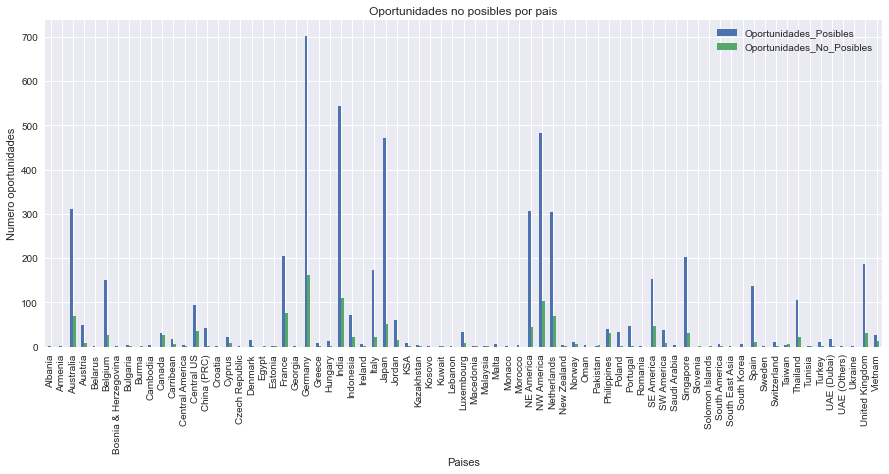

In [13]:
# Gráfico de barras preliminar para tener una vision de en cuales paises tenemos mayor probabilidad
# de al menos conseguir una oportunidad 
# Con esto nos damos cuenta que paises como alemania, japan, india tienen una gran cantidad de
# oportunidades aceptadas en cuanto a requisitos en, relacion a las oportunidades que no fueron aceptadas

oportunidades_posibles_por_territorio = oportunidades_factibles_trtr[['Oportunidades_Posibles']]
oportunidades_posibles_por_territorio['Oportunidades_No_Posibles'] \
    = oportunidades_no_factibles_trtr['Oportunidades_No_Posibles']

oportunidades_posibles_por_territorio.plot(kind = 'bar', title = 'Oportunidades no posibles por pais'\
    , linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Numero oportunidades')
ax.set_xlabel('Paises')
plt.show()

In [14]:
#Analizamos la cantidad de valores únicos de países que poseemos

oportunidades['Territory'].describe()

count        6309
unique         75
top       Germany
freq          863
Name: Territory, dtype: object

In [15]:
# Filtramos los paises que tengan una cantidad razonable para analizar, ya que en el gráfico de barras se ve que hay países
# poco razonables, y no es muy entendible.

cota = oportunidades['Territory'].value_counts().mean()/2
Cantidad_Paises = oportunidades.agg({'Territory': 'value_counts'})
Cantidad_Paises = Cantidad_Paises.reset_index()
Cantidad_Paises = Cantidad_Paises.rename({'Territory':'Cantidad_Paises'}, axis = 'columns')
oportunidades = oportunidades.merge(Cantidad_Paises, left_on='Territory', right_on='index')
oportunidades = oportunidades.loc[oportunidades.Cantidad_Paises >= cota]
oportunidades.Territory.value_counts()

Germany           863
India             653
NW America        586
Japan             522
Australia         381
Netherlands       372
NE America        351
France            280
Singapore         232
United Kingdom    217
SE America        199
Italy             195
Belgium           176
Spain             148
Central US        129
Thailand          127
Indonesia          92
Jordan             75
Philippines        71
Canada             57
Austria            57
Portugal           48
SW America         45
China (PRC)        44
Luxembourg         43
Name: Territory, dtype: int64

In [16]:
# Con el describe podemos darnos cuenta de que de los 71 países originales, logramos quedarnos con 25 que son razonables para el
# análisis

oportunidades['Territory'].describe()

count        5963
unique         25
top       Germany
freq          863
Name: Territory, dtype: object

In [17]:
#Obtenemos las oportunidades posibles y no posibles a partir de las condiciones de aprobación en el nuevo dataset.

oportunidades_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': 'sum'})
oportunidades_factibles_trtr = oportunidades_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_Posibles'})

oportunidades_no_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': contar_ceros})
oportunidades_no_factibles_trtr = oportunidades_no_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_No_Posibles'})

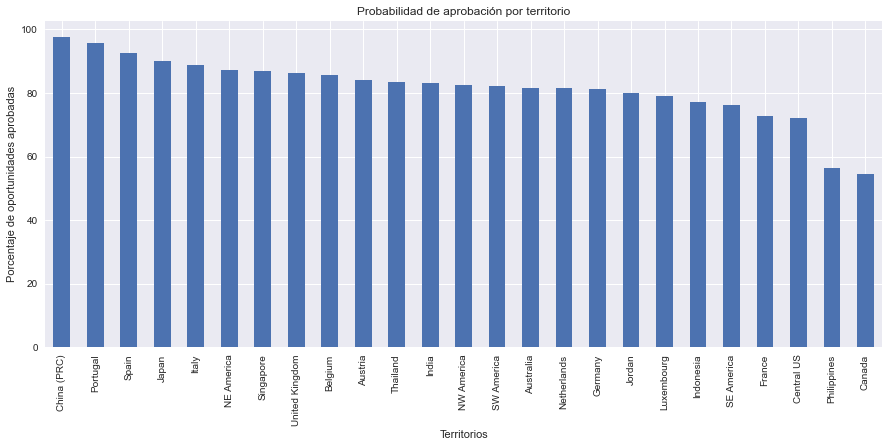

Territory
China (PRC)       97.73
Portugal          95.83
Spain             92.57
Japan             90.23
Italy             88.72
NE America        87.18
Singapore         87.07
United Kingdom    86.18
Belgium           85.80
Austria           84.21
Thailand          83.46
India             83.31
NW America        82.42
SW America        82.22
Australia         81.63
Netherlands       81.45
Germany           81.34
Jordan            80.00
Luxembourg        79.07
Indonesia         77.17
SE America        76.38
France            72.86
Central US        72.09
Philippines       56.34
Canada            54.39
dtype: float64

In [18]:
#Obtenemos el ratio de Aprobadas/No aprobadas para poder armar el nuevo gráfico de barras.

oportunidades_posibles_por_territorio = oportunidades_factibles_trtr[['Oportunidades_Posibles']]
oportunidades_posibles_por_territorio['Oportunidades_No_Posibles'] \
    = oportunidades_no_factibles_trtr['Oportunidades_No_Posibles']

oportunidades_ratio = (oportunidades_posibles_por_territorio['Oportunidades_Posibles']*100/
        (oportunidades_posibles_por_territorio['Oportunidades_Posibles']+\
         oportunidades_posibles_por_territorio['Oportunidades_No_Posibles'])).round(2)

oportunidades_ratio = oportunidades_ratio.sort_values(ascending=False)

#Realizamos el gráfico de barras.

oportunidades_ratio.plot(kind = 'bar', title = 'Probabilidad de aprobación por territorio', linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Porcentaje de oportunidades aprobadas')
ax.set_xlabel('Territorios')
plt.show()
oportunidades_ratio

In [19]:
# Quitamos aquellas filas en donde no se haya dado la aprobación, ya que la única razón para tenerlas es para saber
# la probabilidad de aprobación por territorio.

oportunidades = oportunidades.loc[oportunidades['Es_Oportunidad_Posible'] == 1]
oportunidades = oportunidades.drop('Es_Oportunidad_Posible', axis = 'columns')
oportunidades = oportunidades.reset_index()
oportunidades = oportunidades.drop('level_0', axis = 'columns')
oportunidades.head(10)

,ID,Region,Territory,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,index,Cantidad_Paises
0,27446,Americas,NW America,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,...,NaT,0,USD,83865.60,USD,83865.60,Closed Won,Prod_Category_A_None,NW America,586
1,27455,Americas,NW America,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,...,NaT,0,USD,50688.00,USD,50688.00,Closed Won,Prod_Category_A_None,NW America,586
2,21527,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1828,631,...,NaT,0,USD,2814.00,USD,2814.00,Closed Won,Prod_Category_A_None,NW America,586
3,21530,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1830,632,...,NaT,0,USD,55300.00,USD,55300.00,Closed Won,Prod_Category_A_None,NW America,586
4,21534,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1829,633,...,NaT,0,USD,103068.00,USD,103068.00,Closed Won,Prod_Category_A_None,NW America,586
5,21262,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1831,651,...,NaT,0,USD,6261.15,USD,6261.15,Closed Won,Prod_Category_A_None,NW America,586
6,20715,Americas,NW America,Bureaucratic_Code_4,2013-08-22,Source_7,United States,Account_Name_1319,Opportunity_Name_784,666,...,NaT,26,USD,11699910.00,USD,11699910.00,Closed Lost,Prod_Category_A_None,NW America,586
7,21560,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1832,667,...,NaT,0,USD,5027.40,USD,5027.40,Closed Won,Prod_Category_A_None,NW America,586
8,23216,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1833,749,...,NaT,0,USD,5443.20,USD,5443.20,Closed Won,Prod_Category_A_None,NW America,586
9,20793,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1834,770,...,NaT,0,USD,72800.00,USD,72800.00,Closed Won,Prod_Category_A_None,NW America,586


In [20]:
##################################################################################################################
##################################################################################################################
#    LO DE ARRIBA IRIA BASICAMENTE TODO LO RELACIONADO A CASTEOS Y LIMPIEZA DE DATOS APARTIR DE ABAJO SE PUEDE   #
#              COMENZAR A ANALIZAR LA BASE DE DATOS EN FUNCION AL TARGET QUE TENEMOS QUE ES EL STAGE             #
#      SI DEBEMOS CASTEAR ALGO MAS O FILTRAR ALGO NUEVO LO HAREMOS ARRIBA PARA SEPARAR DEL ANALISIS DEL TARGET   #
##################################################################################################################
##################################################################################################################

In [21]:
# Agrupamos por territorio, y analizamos la cantidad de Closed Won y Closed Lost obtenidos por país.
# Dado que los negotiations y proposals son ínfimos en comparacion con los Closed, los tiramos.

oportunidades_stage = oportunidades.groupby('Territory').agg({'Stage':'value_counts'})
oportunidades_stage = oportunidades_stage.unstack()
oportunidades_stage.columns = ['Closed Lost', 'Closed Won', 'a', 'b']
oportunidades_stage = oportunidades_stage.drop(['a','b'], axis='columns')

#Calculamos la probabilidad de que la oportunidad finalice en un closed won por territorio.

oportunidades_stage_ratio = oportunidades_stage['Closed Won']*100/(oportunidades_stage['Closed Won']+oportunidades_stage['Closed Lost'])
oportunidades_stage_ratio = oportunidades_stage_ratio.sort_values(ascending = False)

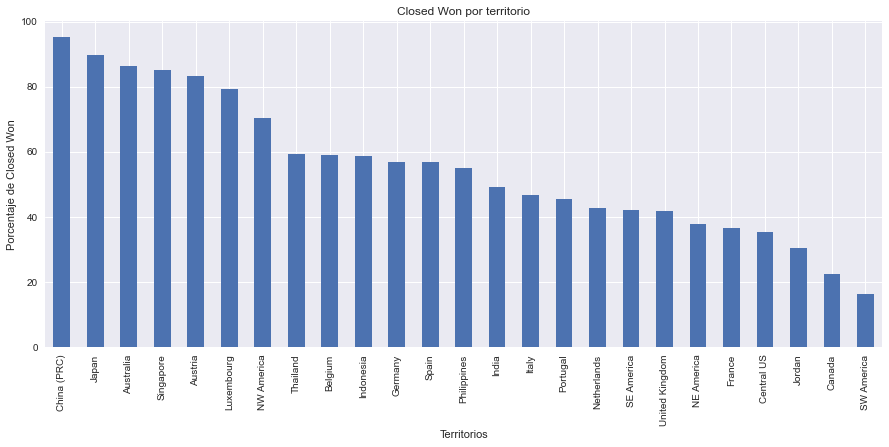

In [22]:
#Graficamos las probabilidades de que haya un closed won en cada territorio dada la aprobación del proyecto previamente.

oportunidades_stage_ratio.plot(kind = 'bar', title = 'Closed Won por territorio', linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Porcentaje de Closed Won')
ax.set_xlabel('Territorios')
plt.show()

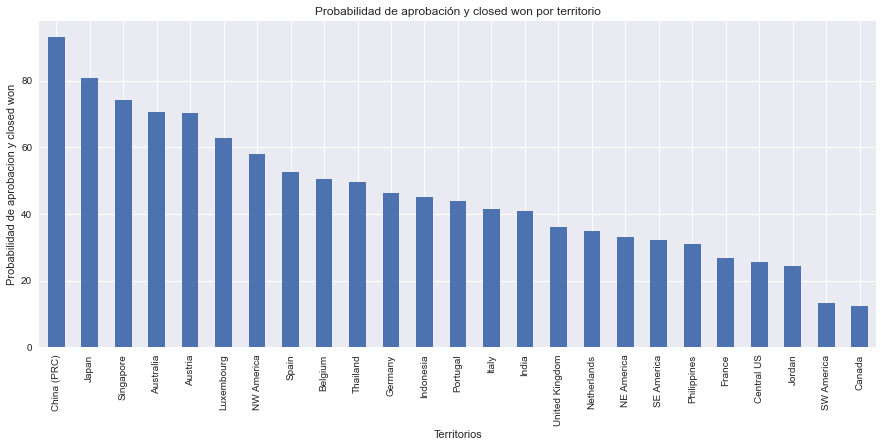

Territory
China (PRC)       93.18
Japan             80.82
Singapore         74.14
Australia         70.61
Austria           70.18
Luxembourg        62.79
NW America        57.99
Spain             52.70
Belgium           50.57
Thailand          49.60
Germany           46.35
Indonesia         45.20
Portugal          43.75
Italy             41.54
India             40.96
United Kingdom    35.95
Netherlands       34.79
NE America        33.05
SE America        32.16
Philippines       30.99
France            26.79
Central US        25.58
Jordan            24.41
SW America        13.33
Canada            12.28
dtype: float64

In [23]:
# Ahora conociendo la probabilidad de aprobacion, y la probabilidad de que haya closed won dada la aprobación,
# podemos obtener la probabilidad total multiplicando las mismas.

probabilidad_total_closed_won = oportunidades_ratio*oportunidades_stage_ratio/100
probabilidad_total_closed_won = probabilidad_total_closed_won.round(2)
probabilidad_total_closed_won = probabilidad_total_closed_won.sort_values(ascending = False)

# Graficamos las probabilidades para todos los territorios presentes

probabilidad_total_closed_won.plot(kind = 'bar', title = 'Probabilidad de aprobación y closed won por territorio', linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Probabilidad de aprobacion y closed won')
ax.set_xlabel('Territorios')
plt.show()
probabilidad_total_closed_won

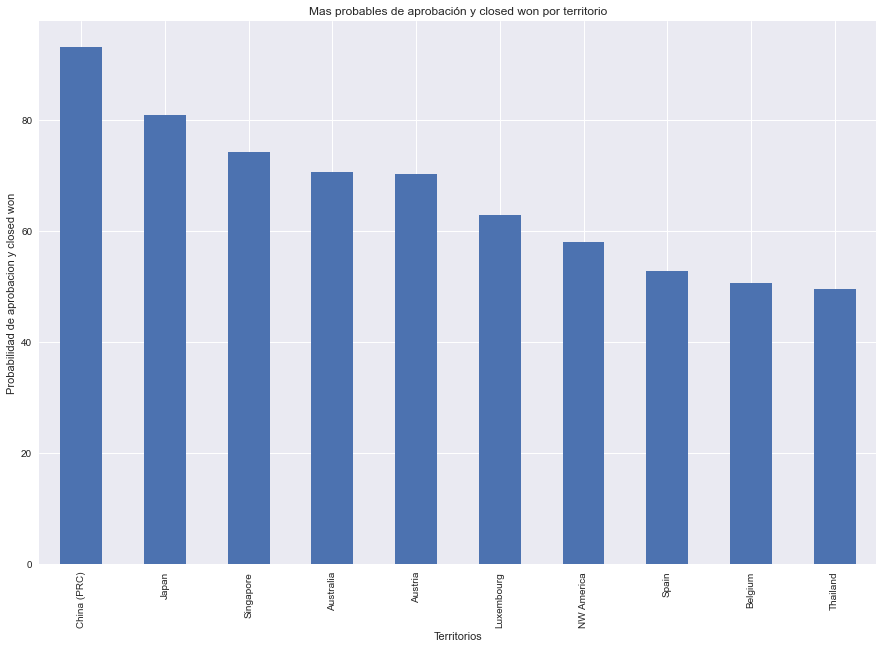

Territory
China (PRC)    93.18
Japan          80.82
Singapore      74.14
Australia      70.61
Austria        70.18
Luxembourg     62.79
NW America     57.99
Spain          52.70
Belgium        50.57
Thailand       49.60
dtype: float64

In [24]:
# Entonces, a nosotros nos interesan los mejores países para invertir (Los más probables de obtener un closed won, y de que nos
# acepten).

probabilidad_total_closed_won_top_10 = probabilidad_total_closed_won.nlargest(10)

probabilidad_total_closed_won_top_10.plot(kind = 'bar', title = 'Mas probables de aprobación y closed won por territorio',\
                                          linewidth = 4, figsize = (15,10))
ax = plt.gca()
ax.set_ylabel('Probabilidad de aprobacion y closed won')
ax.set_xlabel('Territorios')
plt.show()
probabilidad_total_closed_won_top_10

In [25]:
#Nos quedamos con los 10 mas probables para realizar un histograma de los closed won respecto de la fecha

probabilidad_total_closed_won_top_10 = probabilidad_total_closed_won_top_10.reset_index()

oportunidades_stage_top10 = oportunidades.loc[:,['Opportunity_Created_Date','Territory','Stage']]
oportunidades_stage_top10 = oportunidades_stage_top10.merge(probabilidad_total_closed_won_top_10, on='Territory', how = 'inner')
oportunidades_stage_top10 = oportunidades_stage_top10[['Opportunity_Created_Date','Territory','Stage']]
oportunidades_stage_top10 = oportunidades_stage_top10.loc[(oportunidades_stage_top10['Stage'] == 'Closed Won') |\
                                             (oportunidades_stage_top10['Stage'] == 'Closed Lost')]
oportunidades_stage_top10

,Opportunity_Created_Date,Territory,Stage
0,2015-12-08,NW America,Closed Won
1,2015-12-09,NW America,Closed Won
2,2017-02-03,NW America,Closed Won
3,2017-02-03,NW America,Closed Won
4,2017-02-03,NW America,Closed Won
...,...,...,...
1981,2018-01-23,Luxembourg,Closed Won
1982,2018-02-06,Luxembourg,Closed Lost
1983,2018-06-29,Luxembourg,Closed Won
1984,2018-07-14,Luxembourg,Closed Won


In [26]:
#Modificamios la fecha haciendo que haya una columna por año y otra para mes que son los datos que nos interesan

oportunidades_stage_top10['Opportunity_Created_Date'] = oportunidades_stage_top10['Opportunity_Created_Date'].dt.year.astype(str)\
                                    +'-'+oportunidades_stage_top10['Opportunity_Created_Date'].dt.month.astype(str)
oportunidades_stage_top10

,Opportunity_Created_Date,Territory,Stage
0,2015-12,NW America,Closed Won
1,2015-12,NW America,Closed Won
2,2017-2,NW America,Closed Won
3,2017-2,NW America,Closed Won
4,2017-2,NW America,Closed Won
...,...,...,...
1981,2018-1,Luxembourg,Closed Won
1982,2018-2,Luxembourg,Closed Lost
1983,2018-6,Luxembourg,Closed Won
1984,2018-7,Luxembourg,Closed Won


In [27]:
#Obtenemos una tabla de territorio, con su año, y su cantidad de closed lost y won.

oportunidades_stage_top10 = oportunidades_stage_top10.groupby(['Opportunity_Created_Date','Territory'])\
                                .agg({'Stage':'value_counts'}).rename(columns={'Stage':'Cant_Oportunidades_En_Stage'})
oportunidades_stage_top10 = oportunidades_stage_top10.unstack()
oportunidades_stage_top10.columns = ['Cantidad_Closed_Lost', 'Cantidad_Closed_Won']
oportunidades_stage_top10 = oportunidades_stage_top10.fillna(0)
oportunidades_stage_top10

Cantidad_Closed_Lost  Cantidad_Closed_Won
Opportunity_Created_Date Territory                                            
2015-10                  NW America                   2.0                  2.0
2015-11                  Japan                        0.0                  2.0
                         NW America                   1.0                  0.0
                         Spain                        3.0                  0.0
2015-12                  Austria                      0.0                  1.0
...                                                   ...                  ...
2018-9                   Japan                        2.0                 10.0
                         Luxembourg                   0.0                  1.0
                         NW America                   0.0                  2.0
                         Singapore                    1.0                  3.0
                         Thailand                     2.0                  1.0

[305 rows x 2 columns]

In [28]:
oportunidades_stage_top10 = oportunidades_stage_top10.reset_index()
oportunidades_stage_top10.head()

,Opportunity_Created_Date,Territory,Cantidad_Closed_Lost,Cantidad_Closed_Won
0,2015-10,NW America,2.0,2.0
1,2015-11,Japan,0.0,2.0
2,2015-11,NW America,1.0,0.0
3,2015-11,Spain,3.0,0.0
4,2015-12,Austria,0.0,1.0


In [29]:
#Generamos los datos para realizar un heatmap de closed won por pais y año

for_heatmap_cw = oportunidades_stage_top10.pivot(index='Territory',columns='Opportunity_Created_Date',\
                                                 values='Cantidad_Closed_Won')
for_heatmap_cw = for_heatmap_cw.fillna(0)
for_heatmap_cw

Opportunity_Created_Date,2015-10,2015-11,2015-12,2015-4,2015-5,2015-7,2015-9,2016-1,2016-10,2016-11,...,2018-11,2018-12,2018-2,2018-3,2018-4,2018-5,2018-6,2018-7,2018-8,2018-9
Territory,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,15.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Austria,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,...,1.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,2.0
China (PRC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,0.0
Japan,0.0,2.0,16.0,0.0,0.0,1.0,0.0,13.0,16.0,17.0,...,7.0,9.0,5.0,7.0,5.0,3.0,7.0,2.0,8.0,10.0
Luxembourg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
NW America,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,13.0,0.0,...,14.0,6.0,5.0,5.0,8.0,5.0,9.0,10.0,11.0,2.0
Singapore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,...,0.0,0.0,4.0,3.0,5.0,10.0,10.0,7.0,12.0,3.0
Spain,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,...,1.0,2.0,0.0,1.0,0.0,3.0,0.0,3.0,1.0,0.0


In [30]:
#Generamos los datos para realizar un heatmap de closed lost por pais y año

for_heatmap_cl = oportunidades_stage_top10.pivot(index='Territory',columns='Opportunity_Created_Date',\
                                                 values='Cantidad_Closed_Lost')
for_heatmap_cl = for_heatmap_cl.fillna(0)
for_heatmap_cl

Opportunity_Created_Date,2015-10,2015-11,2015-12,2015-4,2015-5,2015-7,2015-9,2016-1,2016-10,2016-11,...,2018-11,2018-12,2018-2,2018-3,2018-4,2018-5,2018-6,2018-7,2018-8,2018-9
Territory,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,3.0,2.0,1.0,1.0,2.0,1.0,5.0,1.0
China (PRC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Japan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0
Luxembourg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NW America,2.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,4.0,1.0,...,0.0,0.0,3.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0
Singapore,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
Spain,0.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,...,0.0,0.0,4.0,3.0,3.0,3.0,0.0,1.0,2.0,0.0


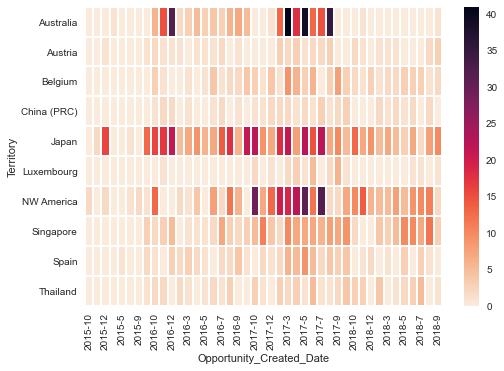

In [31]:
#Armamos el heatmap de closed won con los datos anteriores
graph_closed_won_hm = sns.heatmap(for_heatmap_cw, linewidth = 1,cmap='rocket_r')
graph_closed_won_hm

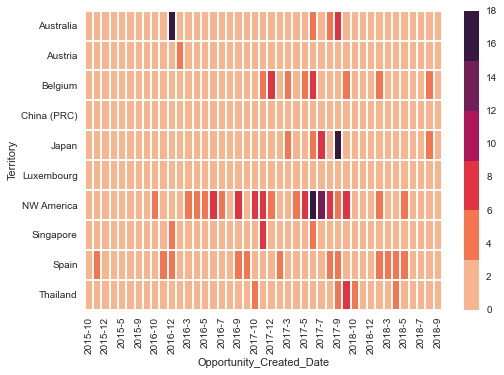

In [32]:
#Armamos el heatmap de closed lost con los datos anteriores

graph_closed_lost_hm = sns.heatmap(for_heatmap_cl, linewidth = 1,cmap=(sns.color_palette("rocket_r")))

graph_closed_lost_hm

In [33]:
world_data = gp.read_file('WorldMap/World_Map.shp')
world_data

for items in (probabilidad_total_closed_won.reset_index())['Territory']:
    world_data_list = world_data['NAME'].tolist()
    if items in world_data_list:
        pass
    else:
        print(items,'no esta en la lista')

China (PRC) no esta en la lista
NW America no esta en la lista
NE America no esta en la lista
SE America no esta en la lista
Central US no esta en la lista
SW America no esta en la lista


In [34]:
probabilidad_total_closed_won = probabilidad_total_closed_won.reset_index()

In [35]:
probabilidad_total_closed_won.columns = ['Territory','Porcentaje oportunidad ganada']

probabilidad_total_closed_won['Territory'] = probabilidad_total_closed_won['Territory']\
    .replace({ 'Central US': 'United States' ,'NE America': 'United States' , 'NW America': 'United States', \
    'SE America': 'United States','SW America': 'United States' , 'China (PRC)': 'China'})

probabilidad_total_closed_won

,Territory,Porcentaje oportunidad ganada
0,China,93.18
1,Japan,80.82
2,Singapore,74.14
3,Australia,70.61
4,Austria,70.18
5,Luxembourg,62.79
6,United States,57.99
7,Spain,52.70
8,Belgium,50.57
9,Thailand,49.60


In [36]:
grouped = probabilidad_total_closed_won.groupby('Territory').agg({'Porcentaje oportunidad ganada':'mean'})
grouped

,Porcentaje oportunidad ganada
Territory,
Australia,70.610
Austria,70.180
Belgium,50.570
Canada,12.280
China,93.180
France,26.790
Germany,46.350
India,40.960
Indonesia,45.200


In [37]:
merged = world_data.merge(grouped, right_on='Territory', left_on='NAME', how= 'outer')
merged['Porcentaje oportunidad ganada'] = merged['Porcentaje oportunidad ganada'].replace({np.nan: 0})
merged

,NAME,geometry,Porcentaje oportunidad ganada
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0.0
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",0.0
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",0.0
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",0.0
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",0.0
...,...,...,...
240,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015...",0.0
241,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249...",0.0
242,Jersey,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722...",0.0
243,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806...",0.0


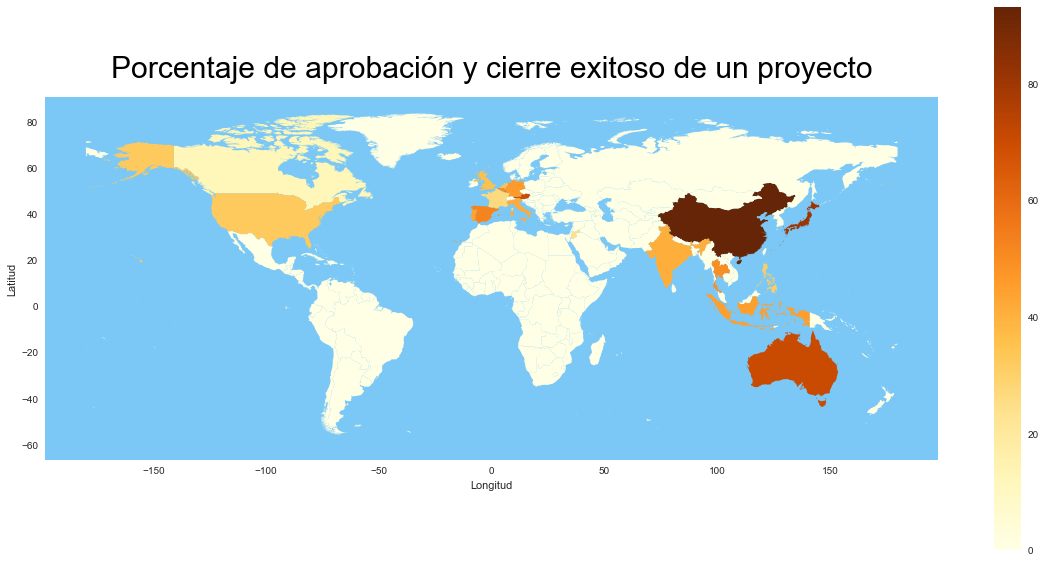

In [38]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
 
# Control del título y los ejes
ax.set_title('Porcentaje de aprobación y cierre exitoso de un proyecto', 
             pad = 20, 
             fontdict={'fontsize':30, 'color': '#000000'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.grid(None)

ax.set_facecolor('xkcd:lightblue')

# Mostrar el mapa finalizado
merged.plot(column='Porcentaje oportunidad ganada', cmap='YlOrBr',legend=True, ax=ax,zorder=5)